<a href="https://colab.research.google.com/github/amanraj2000/Bank_Customer_Retention_Prediction_System/blob/main/Churning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Neural Network (ANN)**

---


###  **Churning Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)

Mounted at /content/drive


In [2]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.7.0


In [4]:
!pip install -q keras

In [5]:
# Importing the dataset

bank_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn_Modelling_datset.csv")
x = bank_data.iloc[:, 3:13]
y = bank_data.iloc[:, 13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
# Creating dummy variables
geography = pd.get_dummies(x["Geography"] , drop_first = True)
gender = pd.get_dummies(x["Gender"] , drop_first = True)

# Concatenate the Data Frames
x = pd.concat([x , geography , gender] , axis = 1)
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [7]:
# Dropping unneccessary columns
x = x.drop(["Geography" , "Gender"] , axis = 1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [8]:
# Splitting dataset into Training and Testing data
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)
x_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [14]:

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

# Intialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform' , activation = 'relu' , input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer= 'he_uniform' , activation= 'relu'))

# Adding the third layer i.e. Output Layer
classifier.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation= 'sigmoid'))

# Compiling the ANN model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics= ['accuracy'])

# Fitting the ANN to the Training set
model_history = classifier.fit(x_train, y_train, validation_split=0.33 , batch_size=10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 3s 3ms/step - loss: 0.5255 - accuracy: 0.7578 - val_loss: 0.4761 - val_accuracy: 0.7944
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4566 - accuracy: 0.8005 - val_loss: 0.4559 - val_accuracy: 0.8001
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4362 - accuracy: 0.8054 - val_loss: 0.4409 - val_accuracy: 0.8020
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4184 - accuracy: 0.8160 - val_loss: 0.4252 - val_accuracy: 0.8145
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4025 - accuracy: 0.8285 - val_loss: 0.4147 - val_accuracy: 0.8228
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3908 - accuracy: 0.8382 - val_loss: 0.4058 - val_accuracy: 0.8273
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3813 - accuracy: 0.8451 - val_loss: 0.3992 - val_accuracy: 0.8338

In [17]:
# Making Predictions and evaluating the model

# Predicting the test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred)
con_mat

array([[1508,   87],
       [ 196,  209]])

In [18]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8585

In [24]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### **Result Plots**








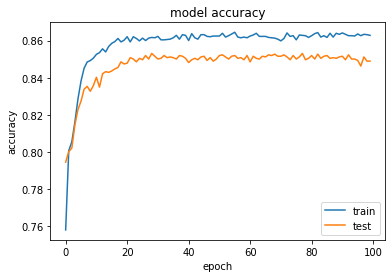

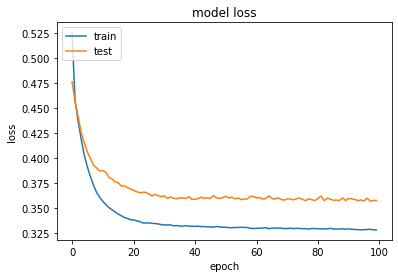

In [25]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()